Modelos de ensamble (Parte I)

1. Importa las librerías necesarias y la base de datos, y realiza un análisis por variable usando visualizaciones. Debes considerar las posibles correlaciones y representarlas en un heatmap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [4]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [6]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


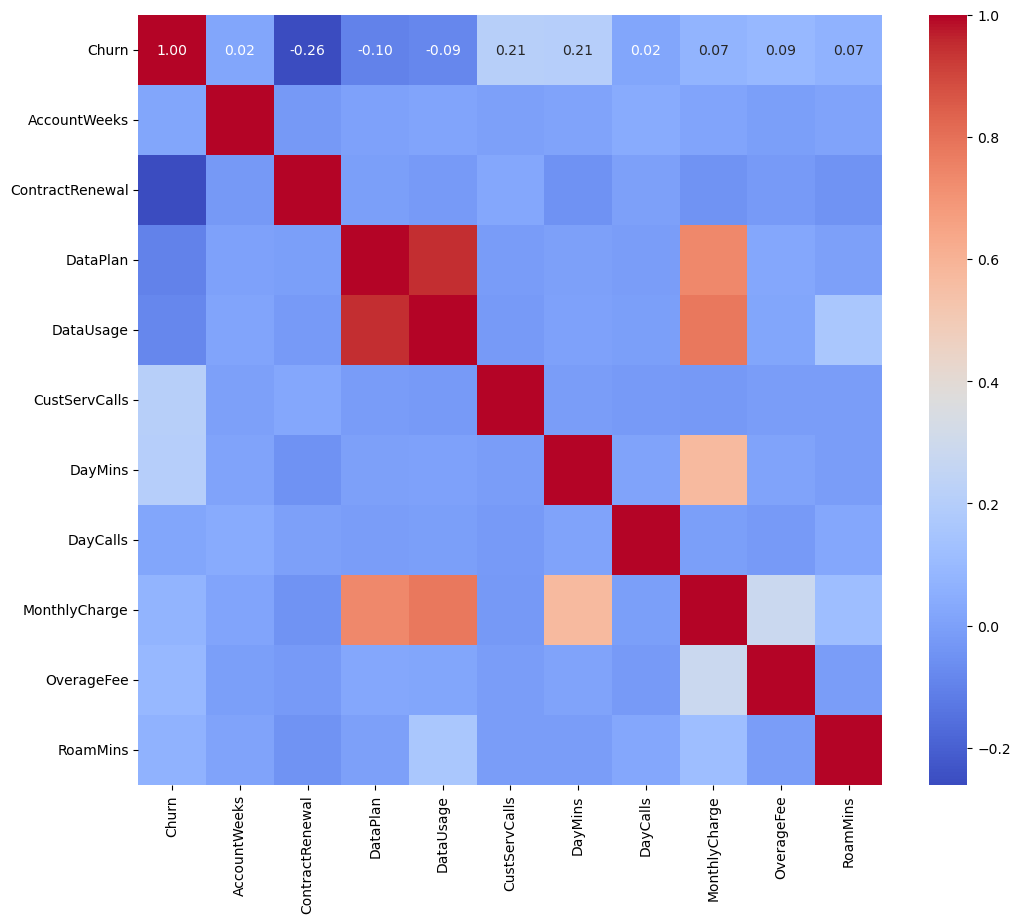

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [14]:
correlation_matrix = df.corr()
correlation_matrix

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


En resumen, aunque 'DataUsage' y 'DataPlan' están estrechamente relacionados entre sí, no son predictores fuertes de la probabilidad de abandono ('Churn'). Otros factores como la cantidad de llamadas al servicio al cliente y la renovación del contrato parecen tener una influencia más fuerte en la predicción del abandono de clientes.

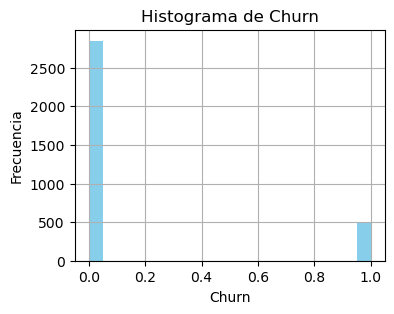

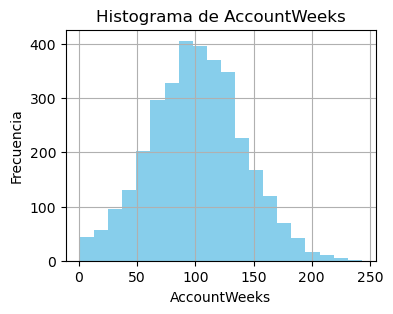

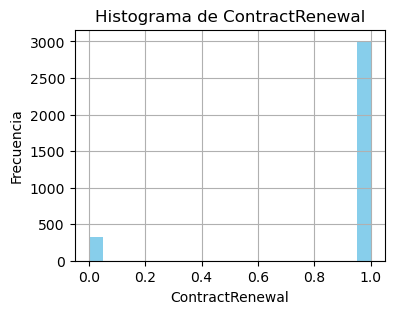

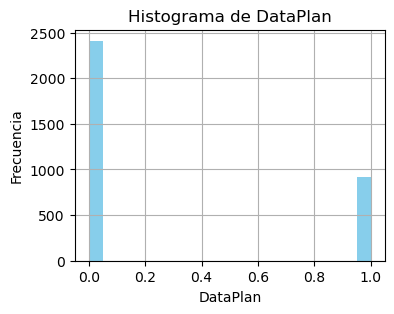

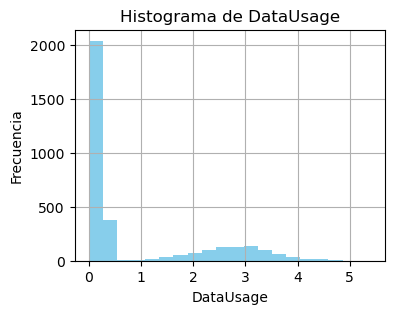

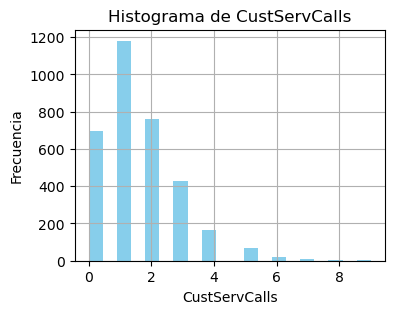

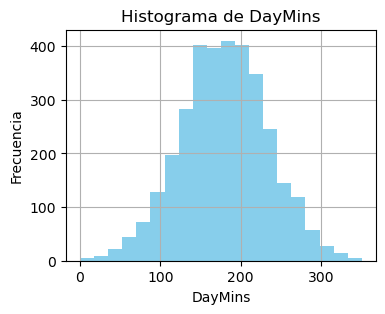

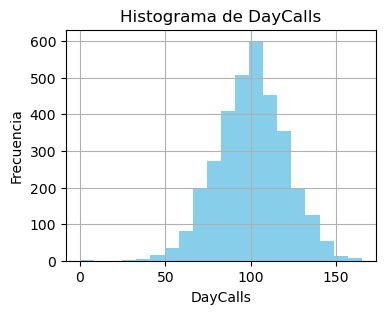

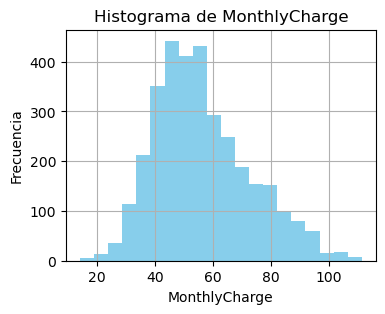

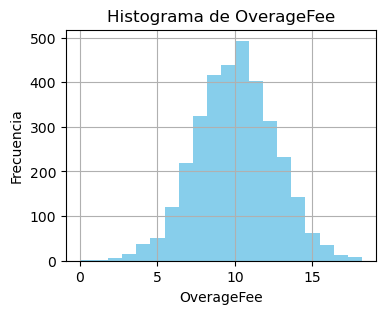

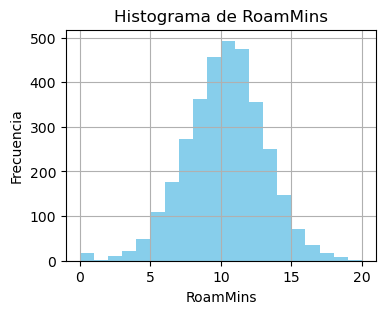

In [12]:
# Seleccionar solo las características numéricas del DataFrame
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Crear histogramas para cada característica numérica
for column in numeric_features.columns:
    plt.figure(figsize=(4, 3))
    plt.hist(df[column], bins=20, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


La mayoria de los datos(excepto los binarios) muestran distribucines normales 

2. Desarrolla un modelo de árbol de decisión sin modificar sus hiper parámetros y
despliega sus métricas de desempeño. Luego, mejora este modelo de forma de
evitar el overfitting usando búsqueda por grilla con 5 kfold:
max_depth: [5, 10, 15, 20, 25]
min_samples_split: [0.01, 0.02, 0.03, 0.04]

In [15]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)

y_pred_base = modelo_ad.predict(X_test)
print("Métricas del modelo sin modificar:")
print(classification_report(y_test, y_pred_base))
print("Accuracy:", accuracy_score(y_test, y_pred_base))

Métricas del modelo sin modificar:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.57      0.58       101

    accuracy                           0.88       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.88      0.87       667

Accuracy: 0.8755622188905547


In [16]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [0.01, 0.02, 0.03, 0.04]
}

grid_search = GridSearchCV(estimator = modelo_ad, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

mejor_modelo_ad = grid_search.best_estimator_
mejor_y_pred = mejor_modelo_ad.predict(X_test)
print("Métricas del modelo mejorado:")
print(classification_report(y_test, mejor_y_pred))
print("Accuracy:", accuracy_score(y_test, mejor_y_pred))

Mejores hiperparámetros encontrados: {'max_depth': 5, 'min_samples_split': 0.03}
Métricas del modelo mejorado:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.85      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667

Accuracy: 0.9115442278860569


3. Balancea las clases usando SMOTE para el conjunto de entrenamiento. Luego, aplica un modelo de Bagging con 200 estimadores y muestra las métricas sobre el conjunto de test.

In [17]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
base_clf = DecisionTreeClassifier()
# Crear el clasificador Bagging con 200 estimadores
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=200, random_state=42)
# Entrenar el modelo Bagging con los datos balanceados
bagging_clf.fit(X_train_resampled, y_train_resampled)
# Predecir sobre el conjunto de prueba
y_pred_bagging = bagging_clf.predict(X_test)
# Evaluar el modelo Bagging
print("Métricas del modelo Bagging con 200 estimadores:")
print(classification_report(y_test, y_pred_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))

Métricas del modelo Bagging con 200 estimadores:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       566
           1       0.64      0.68      0.66       101

    accuracy                           0.89       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.90      0.89      0.90       667

Accuracy: 0.8935532233883059


El modelo Bagging con 200 estimadores muestra un buen rendimiento en términos de precisión, recall y F1-score para ambas clases. La precisión general del modelo es del 89.4%, lo que indica que es capaz de predecir correctamente la clase de un cliente en aproximadamente el 89.4% de los casos.

4. Implementa un modelo de Bagging usando modelos heterogéneos con los siguientes estimadores: Regresión Logística, Árbol de decisión, y dos SVM de clasificación con kernel ‘rbf’ y ‘sigmoid’. Para ello considera 200 muestras bootstrap (T).           Debes calibrar la importancia de los modelos, repitiendo el modelo que sea más importante en la lista de modelos a entrenar. Considera que un mejor modelo es aquel con mejor f1-score. Muestra las métricas del modelo final aplicado al conjunto de test. (Para realizar esta tarea utiliza la función bagging_het que se encuentra en el archivo util_bagging.py

In [21]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


reg_log = LogisticRegression(random_state = 42)

bagg_log = BaggingClassifier(estimator = reg_log, n_estimators=200, random_state = 42)
bagg_log.fit(X_train, y_train)
y_pred_bag_log = bagg_log.predict(X_test)
print("Métricas regresión lógistica")
print(classification_report(y_test, y_pred_bag_log))


arb_desc = DecisionTreeClassifier(random_state = 42)

bagg_arb_des = BaggingClassifier(estimator = arb_desc, n_estimators=200, random_state = 42)
bagg_arb_des.fit(X_train, y_train)
y_pred_bagg_arb_des = bagg_arb_des.predict(X_test)
print("Métricas árbol de desición")
print(classification_report(y_test, y_pred_bagg_arb_des))

svm_rbf = SVC(kernel = "rbf", random_state = 42)
bagg_svm_rbf = BaggingClassifier(estimator = svm_rbf, n_estimators=200, random_state = 42)
bagg_svm_rbf.fit(X_train, y_train)
y_pred_bagg_svm_rbf = bagg_svm_rbf.predict(X_test)
print("Métricas svm_rbf")
print(classification_report(y_test, y_pred_bagg_svm_rbf))

svm_sigmoid = SVC(kernel = "sigmoid", random_state = 42)
bagg_svm_sigmoid = BaggingClassifier(estimator = svm_sigmoid, n_estimators=200, random_state = 42)
bagg_svm_sigmoid.fit(X_train, y_train)
y_pred_svm_sigmoid = bagg_svm_sigmoid.predict(X_test)
print("Métricas svm_sigmoid")
print(classification_report(y_test, y_pred_svm_sigmoid))

Métricas regresión lógistica
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       566
           1       0.46      0.16      0.24       101

    accuracy                           0.84       667
   macro avg       0.66      0.56      0.57       667
weighted avg       0.80      0.84      0.81       667

Métricas árbol de desición
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.59      0.70       101

    accuracy                           0.92       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667

Métricas svm_rbf
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
w

En resumen, el árbol de decisión parece ser el mejor modelo en este conjunto de datos, seguido por la regresión logística. Los modelos SVM, especialmente con el kernel RBF, muestran un rendimiento deficiente en la identificación de casos positivos para la clase 1.

In [24]:
# Entrenamiento
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de cada uno de los estimadores
reg_log = LogisticRegression(random_state=42)
arb_desc = DecisionTreeClassifier(random_state=42)
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_sigmoid = SVC(kernel="sigmoid", random_state=42)
estimators = [reg_log, arb_desc, svm_rbf, svm_sigmoid]

T = 200  # muestras bootstrap (T).


def bagging_het(X_train, y_train, T, estimators, X_test):
    trained_model = []
    yhat_test = np.zeros((X_test.shape[0], T))
    idx_oob = []
    for t in np.arange(0, T):
        sa1 = X_train.sample(n=X_train.shape[0], replace=True)

        idx_oob = list(set(idx_oob + list(set(X_train.index) - set(sa1.index))))

        idx_estimator = np.random.randint(0, len(estimators))
        estimator = estimators[idx_estimator]
        # print(idx_estimator, end='; ')

        estimator.fit(sa1, y_train[sa1.index])
        trained_model.append(estimator)

        yhat_test[:, t] = estimator.predict(X_test)

    # yhat_out = pd.Series(data=mode(yhat_test, axis=1)[0], name='yhat')
    yhat_out = pd.Series(data=mode(yhat_test, axis=1)[0], name='yhat')

    return trained_model, yhat_test, yhat_out, idx_oob


trained_model, yhat_test, yhat_out, idx_oob = bagging_het(X_train, y_train, T, estimators, X_test)

from sklearn.metrics import classification_report

# métricas
print(classification_report(y_test, yhat_out))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.60      0.03      0.06       101

    accuracy                           0.85       667
   macro avg       0.73      0.51      0.49       667
weighted avg       0.81      0.85      0.79       667



In [25]:
#priorizando Arbol de decision
estimators = [ arb_desc, arb_desc, arb_desc, svm_rbf, svm_sigmoid, reg_log]

trained_model, yhat_test, yhat_out, idx_oob = bagging_het(X_train, y_train, T, estimators, X_test)    

from sklearn.metrics import classification_report

# métricas
print(classification_report(y_test, yhat_out))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       566
           1       0.97      0.28      0.43       101

    accuracy                           0.89       667
   macro avg       0.93      0.64      0.68       667
weighted avg       0.90      0.89      0.86       667



In [26]:
#Eliminando modelos de menos desempeño
estimators = [ arb_desc, arb_desc, arb_desc, reg_log]

trained_model, yhat_test, yhat_out, idx_oob = bagging_het(X_train, y_train, T, estimators, X_test)    

from sklearn.metrics import classification_report

# métricas
print(classification_report(y_test, yhat_out))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.86      0.54      0.67       101

    accuracy                           0.92       667
   macro avg       0.89      0.76      0.81       667
weighted avg       0.91      0.92      0.91       667



5. Implementa un modelo de ensamble Random Forest usando como hiper parámetro n_estimators = 45. El modelo debe usar muestra OOB para estimar su ajuste ACCURACY, y debe mostrar las cuatro características más importantes junto con las métricas de desempeño en el conjunto de test.

In [27]:
rf_model = RandomForestClassifier(n_estimators = 45, random_state = 42, oob_score=True, class_weight='balanced')
rf_model.fit(X_train, y_train)

yhat = rf_model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       566
           1       0.81      0.59      0.69       101

    accuracy                           0.92       667
   macro avg       0.87      0.78      0.82       667
weighted avg       0.91      0.92      0.91       667



el recall es del 59%, lo que indica que el 59% de los casos reales de esta clase fueron identificados correctamente por el modelo y f1_score 69%, mejor que aplicando el modelo heterogeneo.

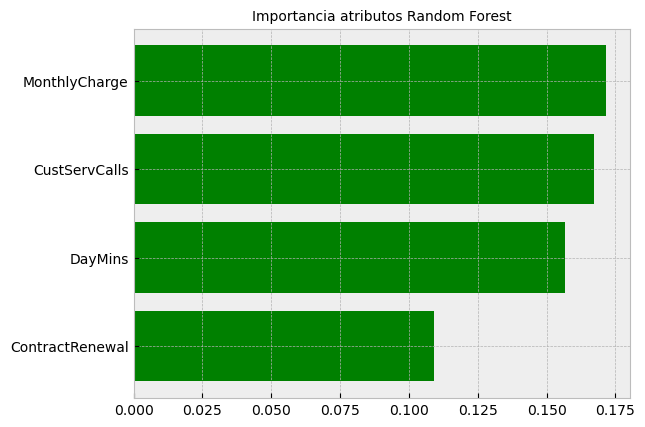

In [29]:
plt.style.use('bmh')

df_importance = pd.DataFrame({
    'atributo': rf_model.feature_names_in_,
    'importancia': rf_model.feature_importances_
}).sort_values(by='importancia', ascending=True)

top_cuatro = df_importance.tail(4)

plt.title('Importancia atributos Random Forest', fontsize=10)
plt.barh(y=top_cuatro['atributo'], width=top_cuatro['importancia'], color='green');  # Cambio de color a verde
plt.show()

6. Realiza una búsqueda de grilla para un modelo Random Forest para los siguientes rangos de valores para sus hiper parámetros: n_estimators: 50 - 200 con paso de 10 completando 15 valores max_features: [‘sqrt’, ‘log2’, None] 
Muestra los mejores hiper parámetros encontrados, la estimación de desempeño en los datos OOB, y despliega los cuatro atributos más importantes. ¿Tienen sentido estos? Analiza además las métricas de desempeño, ROC y AUC.

In [30]:
param_grid = {
    'n_estimators': list(range(50, 201, 10)), 
    'max_features': ['sqrt', 'log2', None] 
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)

print("Mejor puntaje de precisión en validación cruzada:", best_score)

Mejores hiperparámetros encontrados: {'max_features': 'sqrt', 'n_estimators': 160}
Mejor puntaje de precisión en validación cruzada: 0.9351097244766743


In [31]:
#Datos Out of Bag
oob_score = grid_search.best_estimator_.oob_score_
print("Estimación de desempeño en datos OOB:", oob_score)

Estimación de desempeño en datos OOB: 0.9358589647411854


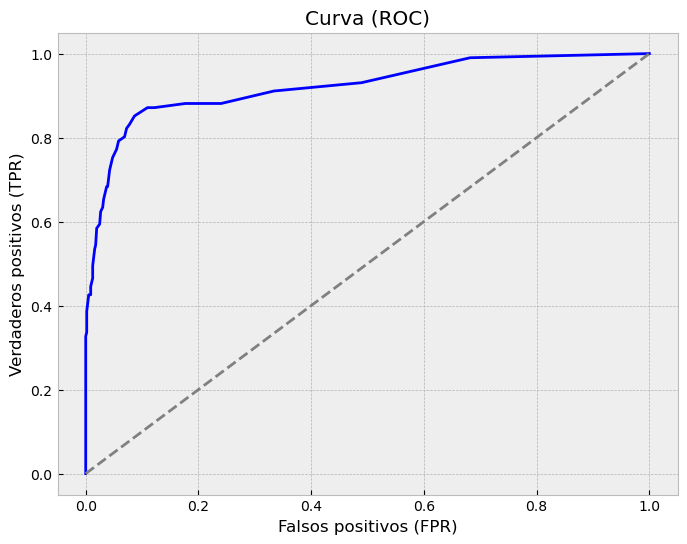

AUC: 0.9219553580799777


In [34]:
# Calcula las probabilidades de predicción para la clase positiva
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calcula la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcula el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color= 'blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Falsos positivos (FPR)')
plt.ylabel('Verdaderos positivos (TPR)')
plt.title('Curva (ROC)')
plt.grid(True)
plt.show()

print("AUC:", auc)

7. Usando el modelo Random Forest con sus hiper parámetros ajustados, muestre los 15 clientes que presentan la mayor propensión a renunciar.

In [35]:
# Obtener las probabilidades de predicción de churn del mejor modelo
probabilidades_prediccion = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Crear un DataFrame con las probabilidades de predicción y los identificadores de los clientes
df_predicciones = pd.DataFrame({
    'Probabilidad de Churn': probabilidades_prediccion,
    'Cliente': X_test.index
})

# Ordenar los clientes por su probabilidad de churn en orden descendente y tomar los 15 primeros
df_predicciones_top = df_predicciones.sort_values(by='Probabilidad de Churn', ascending=False).head(15)

# Mostrar el resumen con la identificación de los clientes
print(df_predicciones_top)


     Probabilidad de Churn  Cliente
640                0.99375     3272
491                0.97500      605
647                0.97500     2536
397                0.97500     3127
91                 0.96875     1078
297                0.96875     1878
73                 0.95625      331
420                0.93750     2325
186                0.93750     1538
630                0.93750     2155
169                0.93750       76
267                0.93125     3291
661                0.92500     2112
187                0.92500     3144
229                0.91875      144


Buen dia profe, en verdad le pido disculpas pr la tardanza, si revisa mi perfil de linkedin: https://www.linkedin.com/in/jos%C3%A9-romero-arredondo/
acabo de cambiar de trabajo, justo gracias a ustedes, pero el cambio de trabajo ha traido consigo muchas responsabilidades y estudiar mucho a diario para adaptarme, cosas como toad, azure data factory, bizagi, power bi y excel avanzado que es lo que por ahora mas me exigen.
Se me ha hecho muy dificil cumplir con lo que piden sin restarle tiempo al bootcamp, he pensado en pausarlo, pero por otro lado tambien quiero terminar cuanto antes. Los desafios se entregaran un poco retardados, si esto ocasiona problemas tendre que pausarlo.
Saludos!